In [67]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [40]:
dataset = pd.read_csv(r'C:\Users\vipul\Desktop\Udemy\Part 3 - Classification\Section 14 - Logistic Regression\Social_Network_Ads.csv')

In [52]:
x = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [54]:
sc_x = StandardScaler()

In [55]:
x_train = sc_x.fit_transform(x_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [96]:
x_test = sc_x.transform(x_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [97]:
reg = LogisticRegression(random_state = 0)

In [98]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
y_pred = reg.predict(x_test)

In [100]:
cm = confusion_matrix(y_pred,y_test)

In [101]:
print(cm)

[[65  8]
 [ 3 24]]


In [106]:
x1,x2 = np.meshgrid(np.arange(start = x_train[:,0].min() - 1,stop = x_train[:,0].max() + 1,step = 0.01),
                    np.arange(start = x_train[:,1].min() - 1,stop = x_train[:,1].max() + 1,step = 0.01))
plt.contourf(x1,x2,reg.predict((np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75,
                                     cmap = ListedColormap(('red','yellow')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],c= ListedColormap(('red','yellow'))(i),label = j)

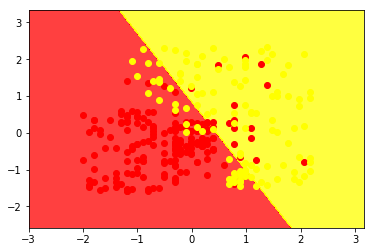

In [107]:
plt.show()